 # Natural Language Processing for Spam classification.

In [20]:
#Imports
import sys
import nltk
import sklearn
import pandas
import numpy
seed = 2020

### 2. Load the Dataset
Now that we have ensured that our libraries are installed correctly, let's load the data set as a Pandas DataFrame. Furthermore, let's extract some useful information such as the column information and class distributions.

The data set we will be using comes from the UCI Machine Learning Repository. It contains over 5000 SMS labeled messages that have been collected for mobile phone spam research. 

In [3]:
import pandas as pd
import numpy as np

# load the dataset of SMS messages. Change it to the right local path.
df = pd.read_table('smsspamcollection/SMSSPamCollection', header=None, encoding='utf-8')

In [4]:
# print useful information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5572 non-null   object
 1   1       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


ham     4825
spam     747
Name: 0, dtype: int64


Text(0.5, 1.0, 'Classes distribution')

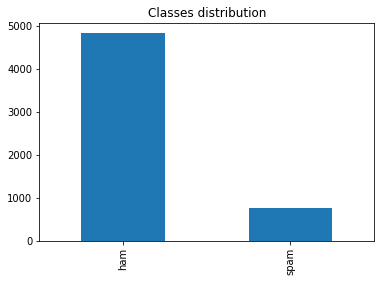

In [6]:
# check class distribution
classes = df[0]
print(classes.value_counts())
classes.value_counts().plot(kind='bar').set_title('Classes distribution')

### 2. Preprocess the Data
Preprocessing the data is an essential step in natural language process. In the following cells, we will convert our class labels to binary values using the LabelEncoder from sklearn, replace email addresses, URLs, phone numbers, and other symbols by using regular expressions, remove stop words, and extract word stems.

In [8]:
from sklearn.preprocessing import LabelEncoder

# convert class labels to binary values, 0 = ham and 1 = spam
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)
np.unique(Y)

array([0, 1])

In [9]:
# store the text message data
text_messages = df[1]
print(text_messages[:10])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: 1, dtype: object


In [12]:
# change words to lower case - Hello, HELLO, hello are all the same word
processed = text_messages.str.lower()
print(processed[0:10])

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
5    freemsg hey there darling it's been 3 week's n...
6    even my brother is not like to speak with me. ...
7    as per your request 'melle melle (oru minnamin...
8    winner!! as a valued network customer you have...
9    had your mobile 11 months or more? u r entitle...
Name: 1, dtype: object


### 3. Generating Features
Feature engineering is the process of using domain knowledge of the data to create features for machine learning algorithms. In this project, the words in each text message will be our features. For this purpose, it will be necessary to tokenize each word. We will use the 1500 most common words as features.

In [15]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
# create bag-of-words
all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

[nltk_data] Downloading package punkt to /Users/youssef/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
# print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 9440
Most common words: [('.', 4738), ('i', 2929), ('to', 2252), ('you', 2236), (',', 1938), ('?', 1550), ('a', 1441), ('!', 1397), ('the', 1337), ('...', 1146), ('u', 1136), ('and', 978), ('&', 922), ('is', 905), ('in', 891)]


In [17]:
# use the 1500 most common words as features
word_features = list(all_words.keys())[:1500]

In [19]:
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

# Lets see an example!
features = find_features(processed[0])
for key, value in features.items():
    if value == True:
        print(key)

go
until
jurong
point
,
crazy
..
available
only
in
bugis
n
great
world
la
e
buffet
...
cine
there
got
amore
wat


In [31]:
type(processed), type(Y)

(pandas.core.series.Series, numpy.ndarray)

In [44]:
import random
# Now lets do it for all the messages
messages = list(zip(processed, Y))
print(type(messages))
print(messages[0])

# define a seed for reproducibility
seed = 1
np.random.seed = seed
random.shuffle(messages)
print(messages[0])

# call find_features function for each SMS message
featuresets = [(find_features(text), label) for (text, label) in messages]
print(featuresets[0])

'4txt/ú1.20': False, 'poboxox36504w45wq': False, 'that': False, 'seriously': False, '‘': False, 'm': False, 'going': False, 'ha': False, 'ü': False, 'pay': False, 'first': False, 'when': False, 'da': False, 'stock': False, 'comin': False, 'aft': False, 'finish': False, 'lunch': False, 'str': False, 'down': False, 'lor': False, 'ard': False, 'smth': False, 'ffffffffff': False, 'alright': False, 'can': False, 'meet': False, 'sooner': False, 'just': False, 'forced': False, 'myself': False, 'eat': False, 'slice': False, 'really': False, 'hungry': False, 'tho': False, 'sucks': False, 'mark': False, 'getting': False, 'worried': False, 'knows': False, 'sick': False, 'turn': False, 'pizza': False, 'lol': False, 'always': False, 'convincing': False, 'catch': False, 'bus': False, 'are': False, 'frying': False, 'an': False, 'egg': False, 'tea': False, 'eating': False, 'mom': False, 'left': False, 'over': False, 'dinner': False, 'love': False, 'amp': False, ';': False, 'we': False, "'re": False, '

In [47]:
# we can split the featuresets into training and testing datasets using sklearn
from sklearn.model_selection import train_test_split

# split the data into training and testing datasets
training, testing = train_test_split(featuresets, test_size = 0.25, random_state=seed)
print(len(training))
print(len(testing))

4179
1393


### 4. Scikit-Learn Classifiers with NLTK
Now that we have our dataset, we can start building algorithms! Let's start with a simple linear support vector classifier, then expand to other algorithms. We'll need to import each algorithm we plan on using from sklearn. We also need to import some performance metrics, such as accuracy_score and classification_report.





In [48]:
# We can use sklearn algorithms in NLTK
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))


SVC Accuracy: 97.84637473079684


### Can we do better ?